In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score 

### Data Collection and Preprocessing 

In [2]:
# loading dataset to pandas dataframe 
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping the missing values 
data = data.dropna()

In [8]:
# Number of missing values in each column
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# Label encoding 

data.replace({'Loan_Status':{'N':0, 'Y':1 }}, inplace = True)

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
# Dependent column values
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
# replacing 3+ with 4 
data['Dependents'] = data['Dependents'].replace(to_replace = '3+', value = 4)

In [17]:
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Data Visualisation 

<AxesSubplot:xlabel='Education', ylabel='count'>

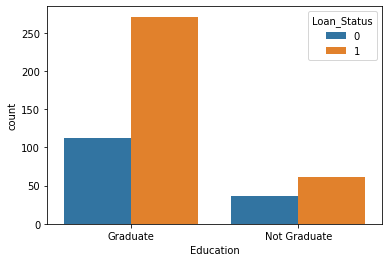

In [20]:
# Education and loan status 
sns.countplot(x = 'Education', hue = 'Loan_Status', data = data)

<AxesSubplot:xlabel='Married', ylabel='count'>

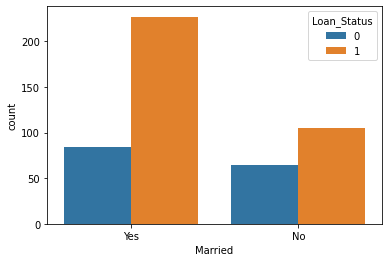

In [22]:
# Meritial Status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

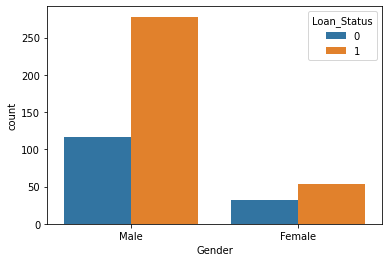

In [23]:
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

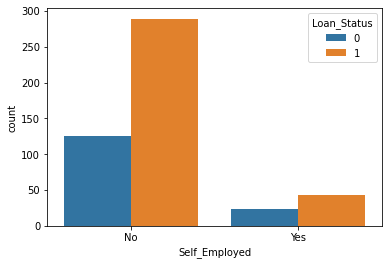

In [24]:
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

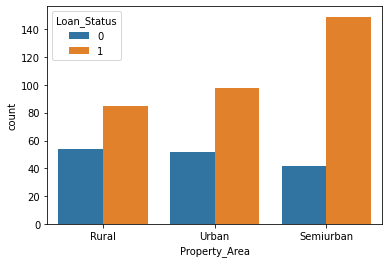

In [26]:
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = data)

In [47]:
# Convert categorical columns to numerical values 
data.replace({'Married':{'No':0, 'Yes':1 }}, inplace = True)

In [28]:
data.replace({'Gender':{'Female':0, 'Male':1 }}, inplace = True)

In [48]:
data.replace({'Self_Employed':{'No':0, 'Yes':1 }}, inplace = True)

In [30]:
data.replace({'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace = True)

In [31]:
data.replace({'Education':{ 'Not Graduate' : 0 ,  'Graduate' : 1 }}, inplace = True)

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [50]:
# Separating data and label
X = data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1) 
Y = data['Loan_Status']

In [51]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [46]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [53]:
# Train Test Split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


### Training the data 

SVM


In [55]:
classifier = svm.SVC(kernel = 'linear')

In [56]:
# Training the SVM  model 
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation 

Accuracy Score

In [57]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [59]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7786458333333334


In [60]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [62]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.8125
